#### 1. Convert the price which in Rs to Dollars, where $1=75
#### 2. Remove $ symbols & Rs from Price cols
#### 3. use address col and create the state col out of it.
#### 4. Perform Preprocessing & Data Cleaning using statistical approach
#### 5. Perform EDA and Statistical Analysis
#### 6. Write your conclusion from analysis

## Use test size 30% and set random state parameter to 1
#### 7. Build Machine Learning Regression of your choice
#### 8. Perform Model Evaluation using Evaluation Matrix
#### 9. Build SVM Model for Regression
#### 10.Evaluate the SVM Regression Model
#### 11. Perform HyperParameter Tuning With Respect to SVM
#### 12. Take User input and create a price prediction function & Test your model.
## Note-: try to achieve 88% Accuracy with SVM model


### importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('RealEstates.xlsx')

In [3]:
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort
0,0.0,79545.458574,missing,?,NaN,23086.800503,1059033.55787,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937
1,1.0,79248.642455,6.0029,6.730821,3.09,40173.072174,Rs20078.545531292668,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN
2,2.0,61287.067179,5.86589,8.512727,5.13,36882.159400,1058987.987876,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN
3,3.0,63345.240046,7.188236,?,NaN,34310.242831,Rs16808.224088392624,USS Barnett\nFPO AP 44820,NaN
4,4.0,59982.197226,5.040555,7.839388,4.23,26354.109472,630943.489339,USNS Raymond\nFPO AE 09386,NaN


In [4]:
df['Avg. Area House Age'].value_counts()

missing             5
7.58525342394363    1
5.29742769564274    1
5.86699645261666    1
6.50113874124089    1
                   ..
5.6649705006483     1
4.65669574507247    1
5.90229584903971    1
5.58803815292307    1
5.99230530733397    1
Name: Avg. Area House Age, Length: 4996, dtype: int64

In [5]:
df['Avg. Area Number of Rooms'].value_counts()

?                   1667
6.67218106320965       1
7.21998352344203       1
8.02691202818351       1
6.89198032892623       1
                    ... 
8.24662101356097       1
6.17853505260068       1
6.54137569538824       1
4.43037246001408       1
6.79233610442498       1
Name: Avg. Area Number of Rooms, Length: 3334, dtype: int64

In [6]:
df.shape

(5000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   float64
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           5000 non-null   object 
 3   Avg. Area Number of Rooms     5000 non-null   object 
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   object 
 7   Address                       5000 non-null   object 
 8   Avg Area Comfort              200 non-null    float64
dtypes: float64(5), object(4)
memory usage: 351.7+ KB


In [8]:
df['Avg. Area Number of Rooms'] = df['Avg. Area Number of Rooms'].replace('?',np.nan)

In [9]:
df['Avg. Area Number of Rooms']

0            NaN
1       6.730821
2       8.512727
3            NaN
4       7.839388
          ...   
4995         NaN
4996    6.576763
4997    4.805081
4998         NaN
4999    6.792336
Name: Avg. Area Number of Rooms, Length: 5000, dtype: float64

In [10]:
df['Avg. Area House Age'] = df['Avg. Area House Age'].replace('missing',np.nan)

In [11]:
df['Avg. Area House Age']

0            NaN
1       6.002900
2       5.865890
3       7.188236
4       5.040555
          ...   
4995    7.830362
4996    6.999135
4997    7.250591
4998    5.534388
4999    5.992305
Name: Avg. Area House Age, Length: 5000, dtype: float64

In [12]:
df['rs'] = df['Price'].str.extract('(^Rs)')

In [13]:
df['rs'].sample(5)

1130    NaN
2298    NaN
2790    NaN
1000    NaN
1879     Rs
Name: rs, dtype: object

In [14]:
df['Price'].head()

0           1059033.55787
1    Rs20078.545531292668
2          1058987.987876
3    Rs16808.224088392624
4           630943.489339
Name: Price, dtype: object

In [15]:
dfrs = df[df.Price.str.contains('Rs',na =False)]

In [16]:
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,rs
0,0.0,79545.458574,NaN,NaN,NaN,23086.800503,1059033.55787,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937,NaN
1,1.0,79248.642455,6.002900,6.730821,3.09,40173.072174,Rs20078.545531292668,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN,Rs
2,2.0,61287.067179,5.865890,8.512727,5.13,36882.159400,1058987.987876,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN,NaN
3,3.0,63345.240046,7.188236,NaN,NaN,34310.242831,Rs16808.224088392624,USS Barnett\nFPO AP 44820,NaN,Rs
4,4.0,59982.197226,5.040555,7.839388,4.23,26354.109472,630943.489339,USNS Raymond\nFPO AE 09386,NaN,NaN


In [17]:
dfrs = df.loc[df['Price'].str.contains("Rs",na=False)] # case = false

In [18]:
dfrs.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,rs
1,1.0,79248.642455,6.002900,6.730821,3.09,40173.072174,Rs20078.545531292668,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN,Rs
3,3.0,63345.240046,7.188236,NaN,NaN,34310.242831,Rs16808.224088392624,USS Barnett\nFPO AP 44820,NaN,Rs
5,5.0,80175.754159,4.988408,6.104512,4.04,26748.428425,Rs14241.840991913738,"06039 Jennifer Islands Apt. 443\nTracyport, KS...",NaN,Rs
7,7.0,78394.339278,6.989780,6.620478,2.42,36516.358972,Rs20985.820859702955,"972 Joyce Viaduct\nLake William, TN 17778-6483",NaN,Rs
9,9.0,81885.927184,4.423672,NaN,NaN,40149.965749,Rs20602.0641685595,Unit 9446 Box 0958\nDPO AE 97025,NaN,Rs


In [19]:
dfrs['Price'].replace('Rs','')

1       Rs20078.545531292668
3       Rs16808.224088392624
5       Rs14241.840991913738
7       Rs20985.820859702955
9         Rs20602.0641685595
                ...         
4991     Rs16849.60690475704
4993    Rs18424.410387054708
4995    Rs14135.917145128107
4997    Rs13743.061108697195
4999     Rs17319.33973689274
Name: Price, Length: 2500, dtype: object

In [20]:
# dfrs['Price'].strip(['Rs'])
dfrs = dfrs.replace({'Price':'[Rs]'},'',regex=True)

In [21]:
dfrs

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,rs
1,1.0,79248.642455,6.002900,6.730821,3.09,40173.072174,20078.545531292668,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN,Rs
3,3.0,63345.240046,7.188236,NaN,NaN,34310.242831,16808.224088392624,USS Barnett\nFPO AP 44820,NaN,Rs
5,5.0,80175.754159,4.988408,6.104512,4.04,26748.428425,14241.840991913738,"06039 Jennifer Islands Apt. 443\nTracyport, KS...",NaN,Rs
7,7.0,78394.339278,6.989780,6.620478,2.42,36516.358972,20985.820859702955,"972 Joyce Viaduct\nLake William, TN 17778-6483",NaN,Rs
9,9.0,81885.927184,4.423672,NaN,NaN,40149.965749,20602.0641685595,Unit 9446 Box 0958\nDPO AE 97025,NaN,Rs
...,...,...,...,...,...,...,...,...,...,...
4991,4991.0,74102.191890,5.657841,7.683993,3.13,24041.270592,16849.60690475704,"2871 John Lodge\nAmychester, GU 61734-5597",NaN,Rs
4993,4993.0,69639.140896,5.007510,7.778375,6.05,54056.128430,18424.410387054708,"5259 David Causeway Apt. 975\nSouth Alexstad, ...",NaN,Rs
4995,4995.0,60567.944140,7.830362,NaN,NaN,22837.361035,14135.917145128107,USNS Williams\nFPO AP 30153-7653,NaN,Rs
4997,4997.0,63390.686886,7.250591,4.805081,2.13,33266.145490,13743.061108697195,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",NaN,Rs


In [22]:
dfrs[['Price']] = dfrs[['Price']].apply(pd.to_numeric)

In [23]:
dfrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1 to 4999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           2500 non-null   float64
 1   Avg. Area Income              2500 non-null   float64
 2   Avg. Area House Age           2500 non-null   float64
 3   Avg. Area Number of Rooms     1667 non-null   float64
 4   Avg. Area Number of Bedrooms  1667 non-null   float64
 5   Area Population               2500 non-null   float64
 6   Price                         2500 non-null   float64
 7   Address                       2500 non-null   object 
 8   Avg Area Comfort              100 non-null    float64
 9   rs                            2500 non-null   object 
dtypes: float64(8), object(2)
memory usage: 214.8+ KB


In [24]:
dfrs['Price'] = dfrs['Price']*75

In [25]:
dfrs.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,rs
1,1.0,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN,Rs
3,3.0,63345.240046,7.188236,NaN,NaN,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,NaN,Rs
5,5.0,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS...",NaN,Rs
7,7.0,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483",NaN,Rs
9,9.0,81885.927184,4.423672,NaN,NaN,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025,NaN,Rs


In [26]:
dfrs = dfrs.drop('rs',axis=1)

In [27]:
dfrs.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort
1,1.0,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN
3,3.0,63345.240046,7.188236,NaN,NaN,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,NaN
5,5.0,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS...",NaN
7,7.0,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483",NaN
9,9.0,81885.927184,4.423672,NaN,NaN,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025,NaN


In [28]:
# df = df.drop('rs',axis=1)

In [29]:
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,rs
0,0.0,79545.458574,NaN,NaN,NaN,23086.800503,1059033.55787,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937,NaN
1,1.0,79248.642455,6.002900,6.730821,3.09,40173.072174,Rs20078.545531292668,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN,Rs
2,2.0,61287.067179,5.865890,8.512727,5.13,36882.159400,1058987.987876,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN,NaN
3,3.0,63345.240046,7.188236,NaN,NaN,34310.242831,Rs16808.224088392624,USS Barnett\nFPO AP 44820,NaN,Rs
4,4.0,59982.197226,5.040555,7.839388,4.23,26354.109472,630943.489339,USNS Raymond\nFPO AE 09386,NaN,NaN


In [30]:
# df=df.drop(df[df['Price']==df['Price'].str.contains('RS',regex=False)].index)
dfn = df[df["Price"].str.contains("Rs",na=False) == False]

In [31]:
dfn

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,rs
0,0.0,79545.458574,NaN,NaN,NaN,23086.800503,1059033.55787,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937,NaN
2,2.0,61287.067179,5.865890,8.512727,5.13,36882.159400,1058987.987876,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN,NaN
4,4.0,59982.197226,5.040555,7.839388,4.23,26354.109472,630943.489339,USNS Raymond\nFPO AE 09386,NaN,NaN
6,6.0,64698.463428,6.025336,NaN,NaN,60828.249085,1502055.817374,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ...",NaN,NaN
8,8.0,59927.660813,5.362126,6.393121,2.30,29387.396003,798869.532833,USS Gilbert\nFPO AA 20957,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4990,4990.0,52723.876555,5.452237,8.124571,6.39,14802.088438,479500.556811,"86727 Kelly Plaza\nLake Veronica, IL 04474",NaN,NaN
4992,4992.0,87499.125743,6.403473,NaN,NaN,40815.199679,1568700.585526,Unit 2096 Box 9559\nDPO AE 80983-8797,NaN,NaN
4994,4994.0,73060.846226,5.293682,6.312253,4.16,22695.695480,905354.91396,"5224 Lamb Passage\nNancystad, GA 16579",NaN,NaN
4996,4996.0,78491.275435,6.999135,6.576763,4.02,25616.115489,1482617.728622,"PSC 9258, Box 8489\nAPO AA 42991-3352",NaN,NaN


In [32]:
dfn['Price']=dfn['Price'].astype(float) 

C:\Users\91777\AppData\Local\Temp/ipykernel_17596/4166284724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Price']=dfn['Price'].astype(float)


In [33]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           2500 non-null   float64
 1   Avg. Area Income              2500 non-null   float64
 2   Avg. Area House Age           2495 non-null   float64
 3   Avg. Area Number of Rooms     1666 non-null   float64
 4   Avg. Area Number of Bedrooms  1666 non-null   float64
 5   Area Population               2500 non-null   float64
 6   Price                         2500 non-null   float64
 7   Address                       2500 non-null   object 
 8   Avg Area Comfort              100 non-null    float64
 9   rs                            0 non-null      object 
dtypes: float64(8), object(2)
memory usage: 214.8+ KB


In [34]:
# df=df.drop(['rs'],axis=1)

In [35]:
# df.head()

In [36]:
dff=pd.concat([dfn,dfrs],axis=0)

In [37]:
dff

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,rs
0,0.0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937,NaN
2,2.0,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN,NaN
4,4.0,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,NaN,NaN
6,6.0,64698.463428,6.025336,NaN,NaN,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ...",NaN,NaN
8,8.0,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4991,4991.0,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,"2871 John Lodge\nAmychester, GU 61734-5597",NaN,NaN
4993,4993.0,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,"5259 David Causeway Apt. 975\nSouth Alexstad, ...",NaN,NaN
4995,4995.0,60567.944140,7.830362,NaN,NaN,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653,NaN,NaN
4997,4997.0,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",NaN,NaN


In [38]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   float64
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           4995 non-null   float64
 3   Avg. Area Number of Rooms     3333 non-null   float64
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   float64
 7   Address                       5000 non-null   object 
 8   Avg Area Comfort              200 non-null    float64
 9   rs                            0 non-null      object 
dtypes: float64(8), object(2)
memory usage: 429.7+ KB


In [39]:
dff.tail()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,rs
4991,4991.0,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,"2871 John Lodge\nAmychester, GU 61734-5597",NaN,NaN
4993,4993.0,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,"5259 David Causeway Apt. 975\nSouth Alexstad, ...",NaN,NaN
4995,4995.0,60567.944140,7.830362,NaN,NaN,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653,NaN,NaN
4997,4997.0,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",NaN,NaN
4999,4999.0,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2...",NaN,NaN


In [40]:
dff.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,rs
0,0.0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937,NaN
2,2.0,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN,NaN
4,4.0,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,NaN,NaN
6,6.0,64698.463428,6.025336,NaN,NaN,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ...",NaN,NaN
8,8.0,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957,NaN,NaN


In [41]:
dff[['Address','State']] = dff.Address.str.split(",",expand=True)

In [42]:
dff.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,rs,State
0,0.0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,208 Michael Ferry Apt. 674\nLaurabury,0.289937,NaN,NE 37010-5101
2,2.0,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,9127 Elizabeth Stravenue\nDanieltown,NaN,NaN,WI 06482-3489
4,4.0,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,NaN,NaN,None
6,6.0,64698.463428,6.025336,NaN,NaN,60828.249085,1.502056e+06,4759 Daniel Shoals Suite 442\nNguyenburgh,NaN,NaN,CO 20247
8,8.0,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957,NaN,NaN,None


In [43]:
dff['STATE'] = dff['State'].str.extract('(\S+)')

In [44]:
dff.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,rs,State,STATE
0,0.0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,208 Michael Ferry Apt. 674\nLaurabury,0.289937,NaN,NE 37010-5101,NE
2,2.0,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,9127 Elizabeth Stravenue\nDanieltown,NaN,NaN,WI 06482-3489,WI
4,4.0,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,NaN,NaN,None,NaN
6,6.0,64698.463428,6.025336,NaN,NaN,60828.249085,1.502056e+06,4759 Daniel Shoals Suite 442\nNguyenburgh,NaN,NaN,CO 20247,CO
8,8.0,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957,NaN,NaN,None,NaN


In [45]:
dff['Area'] = dff['State'].str.extract('(\d\d\d\d\d)')

In [46]:
dff

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,rs,State,STATE,Area
0,0.0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,208 Michael Ferry Apt. 674\nLaurabury,0.289937,NaN,NE 37010-5101,NE,37010
2,2.0,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,9127 Elizabeth Stravenue\nDanieltown,NaN,NaN,WI 06482-3489,WI,06482
4,4.0,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,NaN,NaN,None,NaN,NaN
6,6.0,64698.463428,6.025336,NaN,NaN,60828.249085,1.502056e+06,4759 Daniel Shoals Suite 442\nNguyenburgh,NaN,NaN,CO 20247,CO,20247
8,8.0,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,4991.0,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,2871 John Lodge\nAmychester,NaN,NaN,GU 61734-5597,GU,61734
4993,4993.0,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,5259 David Causeway Apt. 975\nSouth Alexstad,NaN,NaN,IL 42719-2498,IL,42719
4995,4995.0,60567.944140,7.830362,NaN,NaN,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653,NaN,NaN,None,NaN,NaN
4997,4997.0,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,4215 Tracy Garden Suite 076\nJoshualand,NaN,NaN,VA 01707-9165,VA,01707


In [47]:
dff = dff.drop(['Address','rs','State'],axis=1)

In [48]:
dff

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Avg Area Comfort,STATE,Area
0,0.0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,0.289937,NE,37010
2,2.0,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,NaN,WI,06482
4,4.0,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,NaN,NaN,NaN
6,6.0,64698.463428,6.025336,NaN,NaN,60828.249085,1.502056e+06,NaN,CO,20247
8,8.0,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4991,4991.0,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,NaN,GU,61734
4993,4993.0,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,NaN,IL,42719
4995,4995.0,60567.944140,7.830362,NaN,NaN,22837.361035,1.060194e+06,NaN,NaN,NaN
4997,4997.0,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,NaN,VA,01707


# Now we have got Cleaned Data

In [49]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   float64
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           4995 non-null   float64
 3   Avg. Area Number of Rooms     3333 non-null   float64
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   float64
 7   Avg Area Comfort              200 non-null    float64
 8   STATE                         4653 non-null   object 
 9   Area                          4653 non-null   object 
dtypes: float64(8), object(2)
memory usage: 429.7+ KB


In [50]:
dff=dff.drop(columns='ids')

In [51]:
dff.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Avg Area Comfort,STATE,Area
0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,0.289937,NE,37010
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,NaN,WI,06482
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,NaN,NaN,NaN
6,64698.463428,6.025336,NaN,NaN,60828.249085,1.502056e+06,NaN,CO,20247
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,NaN,NaN,NaN


In [52]:
dff.isnull().sum()

Avg. Area Income                   0
Avg. Area House Age                5
Avg. Area Number of Rooms       1667
Avg. Area Number of Bedrooms    1667
Area Population                    0
Price                              0
Avg Area Comfort                4800
STATE                            347
Area                             347
dtype: int64

### Droping Avg Area comfort as there are more than 90% values missing

In [53]:
dff = dff.drop(columns='Avg Area Comfort')

In [54]:
dff.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,4995.000000,3333.000000,3333.000000,5000.000000,5.000000e+03
mean,68583.108984,5.976820,6.994414,3.998083,36163.516039,1.232073e+06
std,10657.991214,0.990794,1.016285,1.239102,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322350,6.290306,3.150000,29403.928702,9.975771e+05
50%,68804.286404,5.970953,7.015253,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650499,7.695977,4.500000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.219902,6.500000,69621.713378,2.469066e+06


C:\Users\91777\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


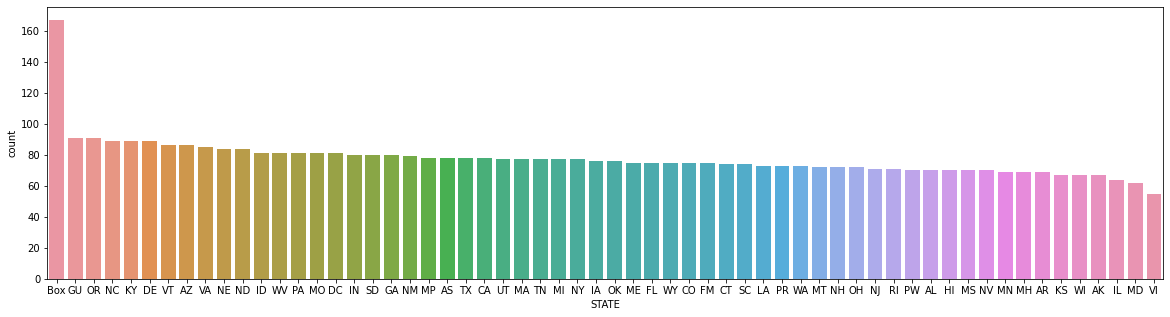

In [55]:
plt.figure(figsize=(20,5))
sns.countplot(dff['STATE'],order=dff['STATE'].value_counts().index[:])
plt.show()

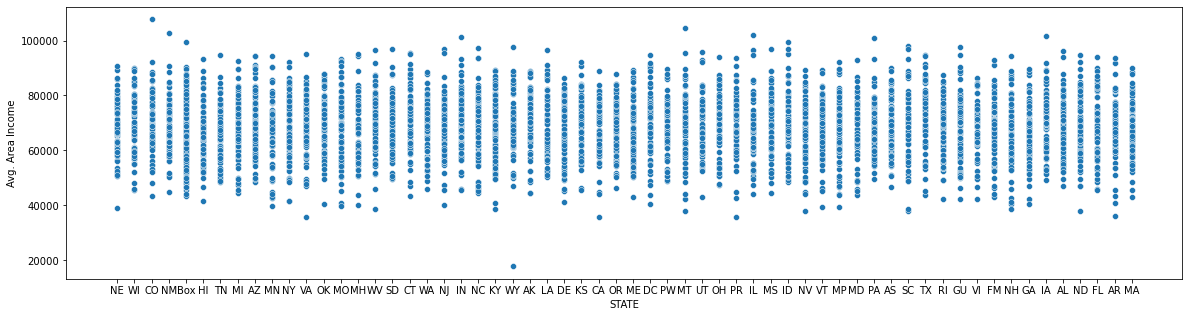

In [56]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=dff['STATE'],y=dff['Avg. Area Income'])
plt.show()

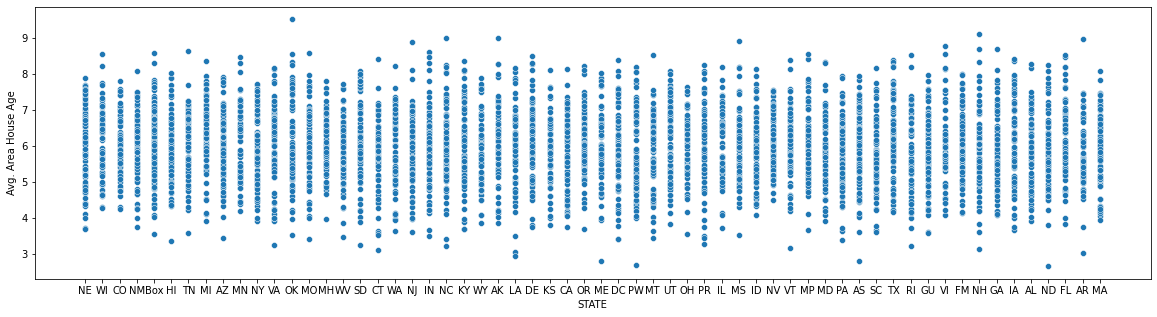

In [57]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=dff['STATE'],y=dff['Avg. Area House Age'])
plt.show()

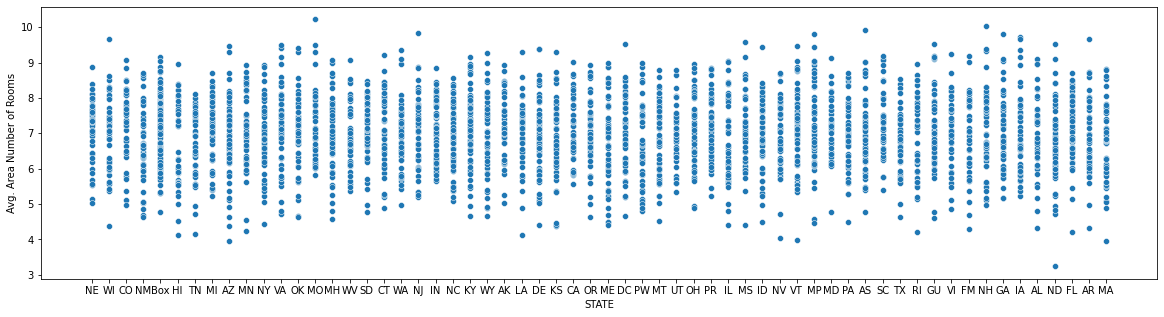

In [58]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=dff['STATE'],y=dff['Avg. Area Number of Rooms'])
plt.show()

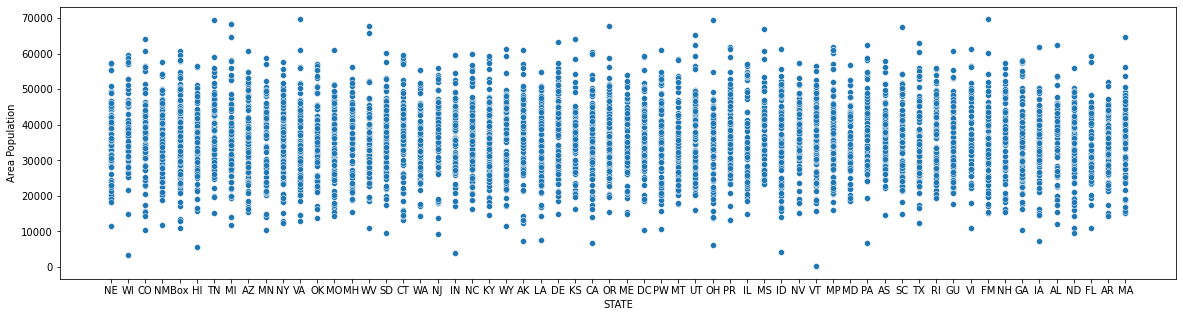

In [59]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=dff['STATE'],y=dff['Area Population'])
plt.show()

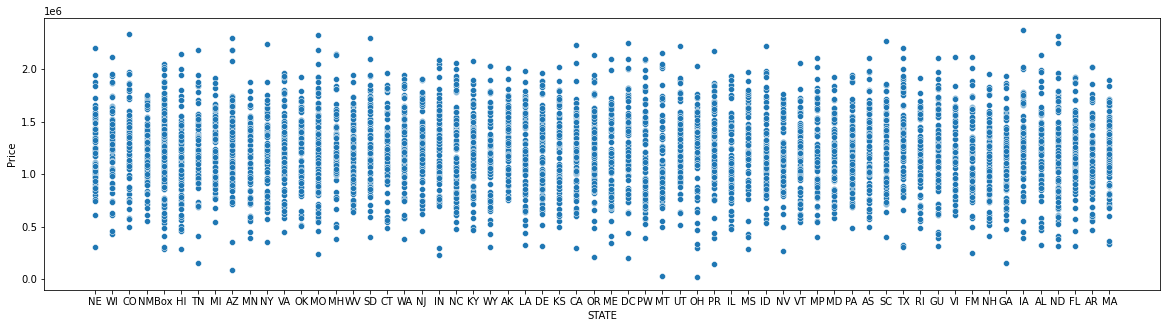

In [60]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=dff['STATE'],y=dff['Price'])
plt.show()

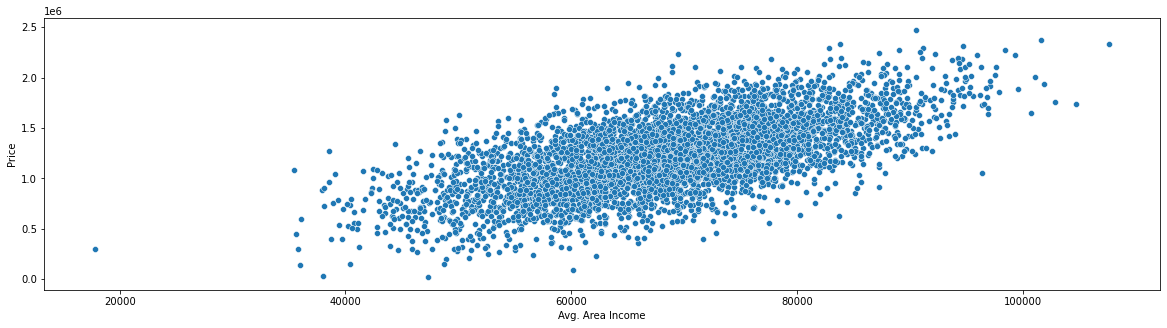

In [61]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=dff['Avg. Area Income'],y=dff['Price'])
plt.show()

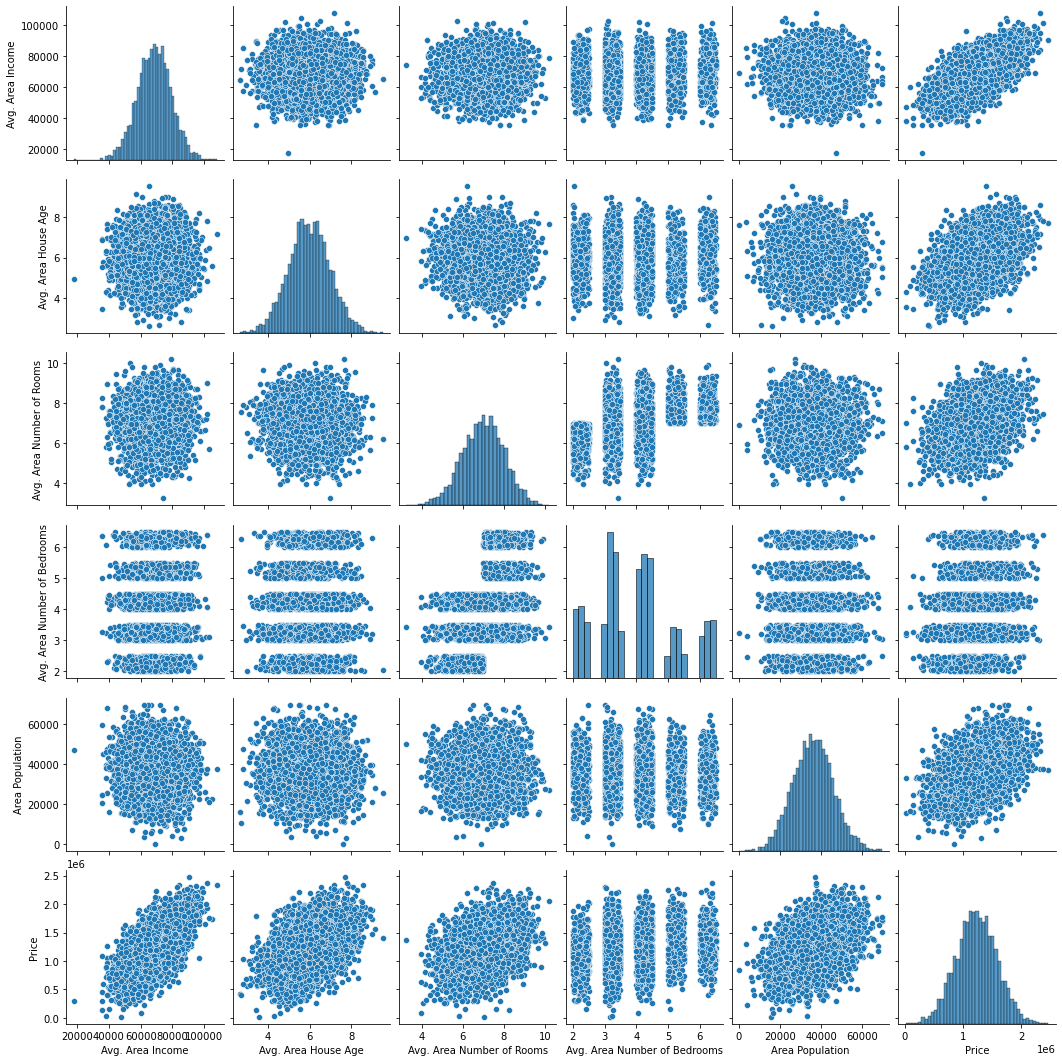

In [62]:
sns.pairplot(dff)

<AxesSubplot:>

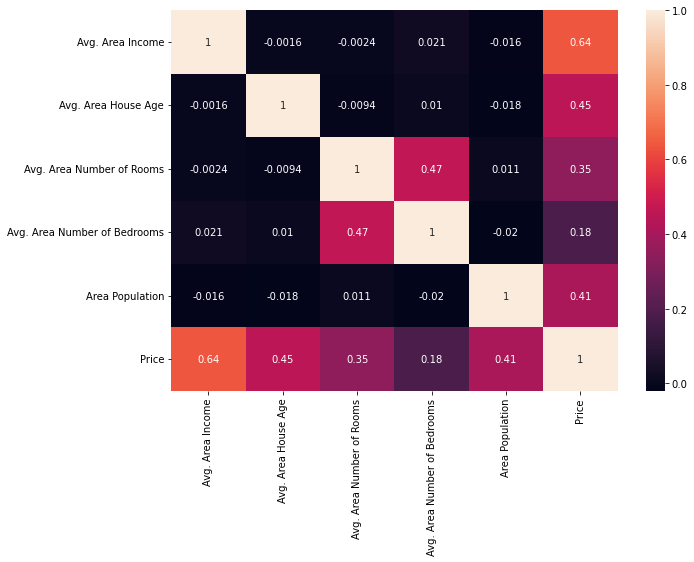

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(dff.corr(),annot=True)

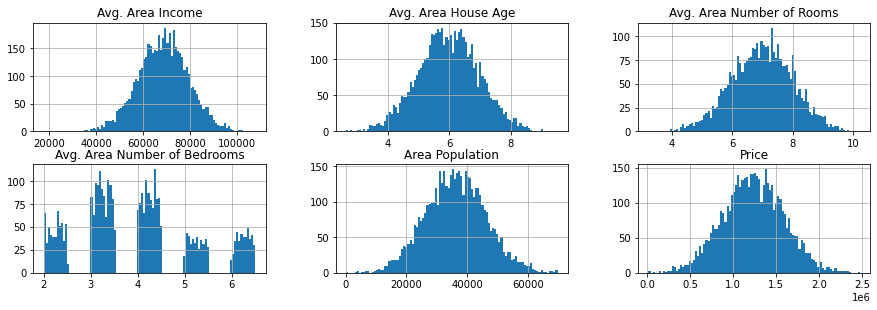

In [64]:
dff.hist(bins=100,figsize= (15,15),layout=(6,3));

## Outliers Handeled by Normal Distribution Method (mean + 3 * Std)

In [65]:
num_col = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population','Price']

In [66]:
for x in dff[num_col]:
    dff[x] = np.where(dff[x] >(dff[x].mean()+(3*dff[x].std())),
                  (dff[x].mean()+(3*dff[x].std())),
                  np.where(dff[x] < (dff[x].mean()-(3*dff[x].std())),
                  (dff[x].mean()-(3*dff[x].std())),
                  dff[x]
                          ))

<AxesSubplot:>

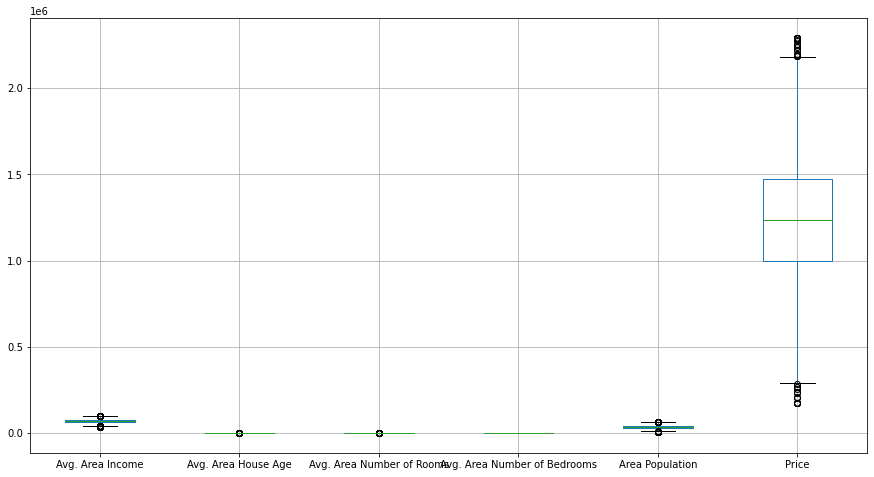

In [67]:
dff.boxplot(figsize=(15,8))

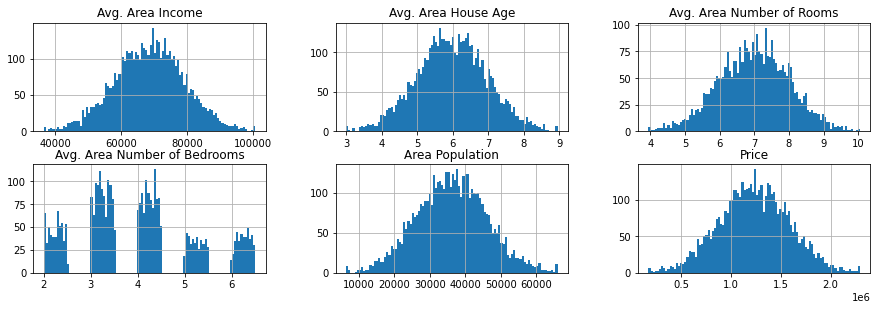

In [68]:
dff.hist(bins=100,figsize= (15,15),layout=(6,3));

## There are outliers present in Area income and Price

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import GridSearchCV

In [70]:
X = dff.drop(['Price','Area','STATE','Avg. Area Number of Bedrooms'],axis=1)
y = dff['Price']

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [72]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
2668,81835.863994,7.749402,5.841565,51039.387815
4537,67481.414738,6.827844,8.136067,18846.254494
130,74706.100532,5.003328,5.661064,39680.609320
354,57497.128153,6.674071,NaN,43204.157615
3979,66484.844242,5.700885,6.908871,28002.647094


In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           5000 non-null   float64
 1   Avg. Area House Age        4995 non-null   float64
 2   Avg. Area Number of Rooms  3333 non-null   float64
 3   Area Population            5000 non-null   float64
dtypes: float64(4)
memory usage: 324.4 KB


In [74]:
dff['STATE'] = dff['STATE'].fillna(dff['STATE'].mode()[0])
dff['Area'] = dff['Area'].fillna(dff['Area'].mode()[0])



## Linear Regression

In [75]:
step1 = ColumnTransformer(transformers=[
    ('trf1',KNNImputer(n_neighbors=5,weights='distance',add_indicator=True),[0,1,2,3])
],remainder='passthrough')

step2 = ColumnTransformer(transformers=[
    ('trf2',KBinsDiscretizer(n_bins= 15,strategy='kmeans',encode='ordinal'),[3])
],remainder='passthrough')

step3 = ColumnTransformer(transformers=[
    ('scale',StandardScaler(),[0,1,2,3])
])

step4 = LinearRegression()


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3),
    ('step4',step4)
    

])

pipe.fit(X_train,y_train)

ypred1=pipe.predict(X_test)                
xpred1 =pipe.predict(X_train)

In [76]:
r2_score(y_test,ypred1)

0.8610316922316871

In [77]:
r2_score(y_train,xpred1)

0.8717497813960897

## Support Vector Machine (regression)

In [78]:
from sklearn.preprocessing import KBinsDiscretizer
step1 = ColumnTransformer(transformers=[
    ('trf1',KNNImputer(n_neighbors=5,weights='uniform',add_indicator=True),[0,1,2,3])
],remainder='passthrough')

step2 = ColumnTransformer(transformers=[
    ('trf2',KBinsDiscretizer(n_bins= 10,strategy='kmeans',encode='ordinal'),[3])
],remainder='passthrough')

step3 = ColumnTransformer(transformers=[
    ('scale',StandardScaler(),[0,1,2,3])
])

step4 = SVR(kernel="poly",C=0.1,coef0=10,gamma='auto',degree=6,epsilon=0.6)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3),
    ('step4',step4)
    

])

pipe.fit(X_train,y_train)

ypred5=pipe.predict(X_test)                
xpred5 =pipe.predict(X_train)

In [79]:
r2_score(y_test,ypred5)

0.8607933725468027

In [80]:
r2_score(y_train,xpred5)

0.8715623610746529

## Random Grid Search CV

In [81]:
# param = {
#     'step4__kernel' :('linear', 'poly', 'rbf', 'sigmoid'),
#     'step4__C' : [0.1,0.01,0.001,10,100],
#     'step4__degree' : [1,3,6,8],
#     'step4__coef0' : [0.01,10,0.5],
#     'step4__gamma' : ('auto','scale'),
#     'step4__epsilon' : [0.3,0.6,0.8,1,10]
# }

# folds = KFold(n_splits=10 , shuffle =True, random_state = 1)

# grids = GridSearchCV(estimator=pipe,param_grid=param,cv=folds,n_jobs=-1)

# grids.fit(X_train,y_train)

In [82]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'step1__trf1__n_neighbors' : [3,5,7,8,10],
    'step1__trf1__weights' : ('uniform','distance'),
    'step2__trf2__n_bins' : [5,10,15,20,25,30],
    'step2__trf2__strategy' :('uniform', 'quantile', 'kmeans'),
    'step4__kernel' :('linear', 'poly', 'rbf', 'sigmoid'),
    'step4__C' : [1,5,10],
    'step4__degree' : [1,3],
    'step4__coef0' : [0.01,10,0.5],
    'step4__gamma' : ('auto','scale')
}

folds = KFold(n_splits=10 , shuffle =True, random_state = 1)

rand_grids = RandomizedSearchCV(estimator=pipe,param_distributions=param,cv=folds,n_jobs=-1)

rand_grids.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('trf1',
                                                                               KNNImputer(add_indicator=True),
                                                                               [0,
                                                                                1,
                                                                                2,
                                                                                3])])),
                                             ('step2',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('trf2',
                  

In [83]:
rand_grids.best_estimator_

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  KNNImputer(add_indicator=True),
                                                  [0, 1, 2, 3])])),
                ('step2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf2',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=15,
                                                                   strategy='kmeans'),
                                                  [3])])),
                ('step3',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  [0, 1, 2, 3])])),
                ('step4', SVR(C=10, coef0=10, epsilon=0.6, kernel='poly'))])

In [84]:
step1 = ColumnTransformer(transformers=[
    ('trf1',KNNImputer(n_neighbors=8,weights='distance',add_indicator=True),[0,1,2,3])
],remainder='passthrough')

step2 = ColumnTransformer(transformers=[
    ('trf2',KBinsDiscretizer(n_bins=30,strategy='uniform',encode='ordinal'),[3])
],remainder='passthrough')

step3 = ColumnTransformer(transformers=[
    ('scale',StandardScaler(),[0,1,2,3])
])

step4 = SVR(kernel="poly",C=5,coef0=10,gamma='auto',degree=6,epsilon=0.6)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3),
    ('step4',step4)
    

])

pipe.fit(X_train,y_train)

ypred6=pipe.predict(X_test)                
xpred6 =pipe.predict(X_train)

In [85]:
r2_score(y_test,ypred6)

0.8659285011668566

In [86]:
# (dff['Avg. Area Income']==1.0).any()

## Bagging Technique

In [87]:
from sklearn.ensemble import BaggingRegressor

In [88]:
step1 = ColumnTransformer(transformers=[
    ('trf1',KNNImputer(n_neighbors=5,weights='uniform',add_indicator=True),[0,1,2,3])
],remainder='passthrough')

step2 = ColumnTransformer(transformers=[
    ('trf2',KBinsDiscretizer(n_bins= 10,strategy='kmeans',encode='ordinal'),[3])
],remainder='passthrough')

step3 = ColumnTransformer(transformers=[
    ('scale',StandardScaler(),[0,1,2,3])
])

step4 =  BaggingRegressor(base_estimator=SVR(kernel="poly",C=0.1,coef0=10,gamma='auto',degree=6,epsilon=0.6),
                         n_estimators=15,
                         bootstrap=False,
                         random_state=1,
                         oob_score=False
                         )

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3),
    ('step4',step4)
    

])

pipe.fit(X_train,y_train)

ypred8=pipe.predict(X_test)                
xpred8 =pipe.predict(X_train)

In [89]:
r2_score(y_test,ypred8)

0.8607933725468027

In [90]:
r2_score(y_train,xpred8)

0.8715623610746529

# Maximun accuracy obtained is 86% with Generalised Model